<a href="https://colab.research.google.com/github/ferdinandl007/MNIST_Experiments/blob/master/Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)


Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


In [0]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [0]:

y_val = y_train[54000:len(y_train)]
y_train = y_train[0:54000]

x_val = x_train[54000:len(x_train)]
x_train = x_train[0:54000]

print(len(x_train))

54000


In [0]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=1500, activation= keras.activations.sigmoid, input_shape=(image_size,)))
model.add(Dense(units=1000, activation=keras.activations.sigmoid))
model.add(Dense(units=500, activation=keras.activations.sigmoid))
model.add(Dense(units=num_classes, activation=keras.activations.softmax))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5010      
Total params: 3,184,010
Trainable params: 3,184,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=keras.optimizers.Adadelta(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

checkpointer = keras.callbacks.ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
model.load_weights('mnist.model.best.hdf5')

history = model.fit(x_train, y_train,
                 batch_size=10,
                 epochs=10,
                 callbacks=[checkpointer],
                 verbose=1,
                 validation_data=(x_val, y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 57s 1ms/step - loss: 0.1433 - acc: 0.9564 - val_loss: 0.1052 - val_acc: 0.9717

Epoch 00001: val_loss improved from inf to 0.10524, saving model to mnist.model.best.hdf5
Epoch 2/10
54000/54000 [==============================] - 55s 1ms/step - loss: 0.1232 - acc: 0.9630 - val_loss: 0.1078 - val_acc: 0.9682

Epoch 00002: val_loss did not improve from 0.10524
Epoch 3/10
54000/54000 [==============================] - 55s 1ms/step - loss: 0.1157 - acc: 0.9662 - val_loss: 0.0986 - val_acc: 0.9733

Epoch 00003: val_loss improved from 0.10524 to 0.09859, saving model to mnist.model.best.hdf5
Epoch 4/10
54000/54000 [==============================] - 55s 1ms/step - loss: 0.1077 - acc: 0.9681 - val_loss: 0.1003 - val_acc: 0.9735

Epoch 00004: val_loss did not improve from 0.09859
Epoch 5/10
54000/54000 [==============================] - 55s 1ms/step - loss: 0.1032 - acc: 0.9698 - val_loss: 0

In [0]:
print(model.optimizer.get_config())

{'lr': 1.0, 'rho': 0.95, 'decay': 0.0, 'epsilon': 1e-07}


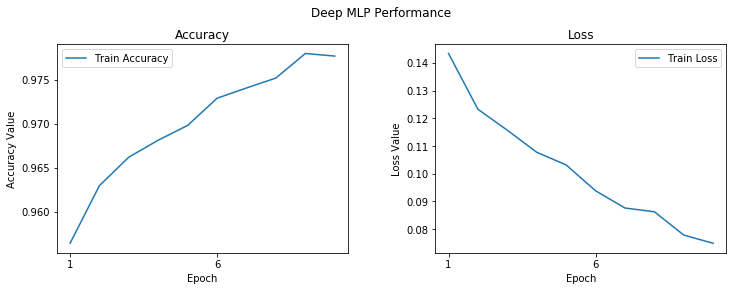

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Deep MLP Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['acc'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
#äax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
#ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.load_weights('mnist.model.best.hdf5')
model.evaluate(x_test, y_test, verbose=True)


In [0]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

In [0]:
model.save_weights("model.h5")

In [0]:
import numpy as np
weight = model.get_weights()
np.savetxt('weight.csv' , weight , fmt='%s', delimiter=',')

In [0]:
weight = model.layers[1].get_weights()
print(weight)

In [0]:
from google.colab import files
#files.download('weight.csv')